# Imports

In [1]:
import argparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Default definitions

In [2]:
sns.set(rc={'figure.figsize':(15.7, 10.27)})
sns.set(font_scale=2.5)

# palette = {'Oracle': '#000000', 'Linear Regression': '#0173b2', 'Graph Convolutional Network': '#de8f05',
#            'Feedforward Neural Network': '#949494', 'Random Forest': '#ece133', 'Dummy': '#029e73'}

palette = {'Oracle': '#000000', 'Linear Regression': '#0173b2', 'Graph Convolutional Network': '#de8f05',
           'Random Forest': '#ece133', 'Dummy': '#029e73', 'Decision Tree': '#d55e00', 
           'Stochastic Gradient Descent': '#cc78bc', 'Bayesian Ridge': '#8E2222', 
           'K-Nearest Neighbors': '#fbafe4', 'Support Vector Machine': '#56b4e9', 'AdaBoost': '#ca9161',
          'Gradient Boosting': '#C292EF'}

selected_models = ['Oracle', 'Dummy', 'Graph Convolutional Network',
                   'Linear Regression', 'Random Forest', 'Bayesian Ridge']


In [3]:
print(sns.color_palette("colorblind").as_hex())
sns.color_palette("colorblind")

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Subset 4

In [4]:
df_oracle = pd.read_csv("/home/gean/Code/nns_performance_prediction/results/oracle/nasbench101_4epochs_k5000_oracle.csv")
df_oracle.describe()

Epoch            K  True_Val_Acc  True_Test_Acc  Best_Test_Acc
count  5000.0  5000.000000  5.000000e+03   5.000000e+03   5.000000e+03
mean      4.0  2500.500000  7.084330e-01   6.986510e-01   7.010880e-01
std       0.0  1443.520003  8.283092e-14   4.774436e-14   6.961795e-14
min       4.0     1.000000  7.084330e-01   6.986510e-01   7.010880e-01
25%       4.0  1250.750000  7.084330e-01   6.986510e-01   7.010880e-01
50%       4.0  2500.500000  7.084330e-01   6.986510e-01   7.010880e-01
75%       4.0  3750.250000  7.084330e-01   6.986510e-01   7.010880e-01
max       4.0  5000.000000  7.084330e-01   6.986510e-01   7.010880e-01

In [5]:
df_gcn = pd.read_csv("/home/gean/Downloads/GCN_Complete_Runs/GCNComplete_Subset4_N172_K5000_nasbench_best_val_test_accs.csv")
df_gcn.describe()

K          Seed  True_Val_Acc  True_Test_Acc
count  35000.000000  35000.000000  35000.000000   35000.000000
mean    2500.500000   1979.142857      0.657491       0.650708
std     1443.396264   4251.610520      0.024362       0.024301
min        1.000000      0.000000      0.209535       0.209836
25%     1250.750000     10.000000      0.651910       0.645767
50%     2500.500000    100.000000      0.657652       0.652644
75%     3750.250000   1234.000000      0.670239       0.665532
max     5000.000000  12345.000000      0.689169       0.682893

In [6]:
df_whole = pd.read_csv("/home/gean/Code/nns_performance_prediction/results/fast/test12/Subset4_N172_K5000_nasbench_best_val_test_accs.csv")
df_whole.describe()

K           Seed  True_Test_Acc   True_Val_Acc
count  600000.000000  600000.000000  600000.000000  600000.000000
mean     2500.500000    1552.100000       0.659529       0.665955
std      1443.376847    3623.567382       0.032594       0.033027
min         1.000000       0.000000       0.111679       0.112013
25%      1250.750000      10.000000       0.646935       0.652544
50%      2500.500000     111.500000       0.665331       0.670072
75%      3750.250000    1000.000000       0.681424       0.691573
max      5000.000000   12345.000000       0.699152       0.708433

In [7]:
df_whole = df_whole.loc[(df_whole['Model'] != 'MLPRegressor') & (df_whole['Model'] != 'Lasso')]

In [8]:
df_whole = df_whole.append(df_gcn)
df_whole = df_whole.append(df_oracle)

df_whole['Model'].replace({'LinearRegression': 'Linear Regression', 
                           'DecisionTreeRegressor': 'Decision Tree', 'SGDRegressor': 'Stochastic Gradient Descent',
                           'BayesianRidge': 'Bayesian Ridge',
                           'KNeighborsRegressor': 'K-Nearest Neighbors', 'SVR': 'Support Vector Machine',
                           'AdaBoostRegressor': 'AdaBoost', 'GradientBoostingRegressor': 'Gradient Boosting',
                           'RandomForestRegressor': 'Random Forest', 'DummyRegressor': 'Dummy',  
                           'GCN_Complete': 'Graph Convolutional Network'}, inplace=True)
df_whole['Model'].unique()
df_whole

K              Model  Seed  True_Test_Acc  True_Val_Acc  Epoch  \
0        1  Linear Regression   0.0       0.515391      0.520967    NaN   
1        2  Linear Regression   0.0       0.515391      0.520967    NaN   
2        3  Linear Regression   0.0       0.515391      0.520967    NaN   
3        4  Linear Regression   0.0       0.515391      0.520967    NaN   
4        5  Linear Regression   0.0       0.515391      0.520967    NaN   
...    ...                ...   ...            ...           ...    ...   
4995  4996             Oracle   NaN       0.698651      0.708433    4.0   
4996  4997             Oracle   NaN       0.698651      0.708433    4.0   
4997  4998             Oracle   NaN       0.698651      0.708433    4.0   
4998  4999             Oracle   NaN       0.698651      0.708433    4.0   
4999  5000             Oracle   NaN       0.698651      0.708433    4.0   

      Best_Test_Acc  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
4995       0.701088  
4996       0.701088  
4997       0.701088  
4998       0.701088  
4999       0.701088  

[540000 rows x 7 columns]

## Selected Models (K10)

<ipython-input-9-60a1469905ec>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


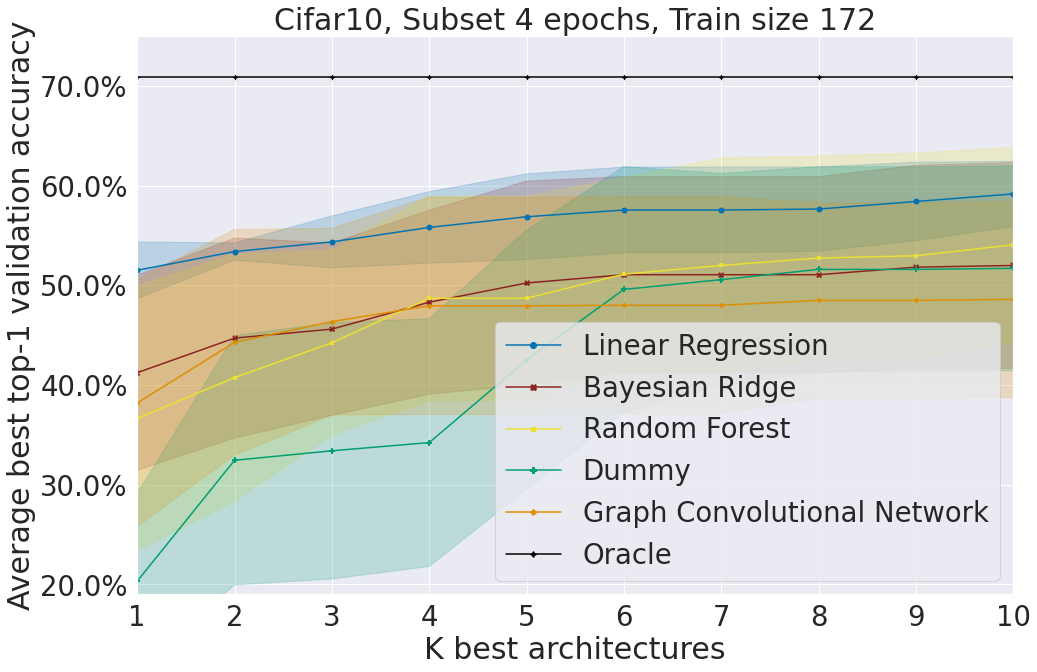

In [9]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.75])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k10_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-10-6394ea44d5e7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


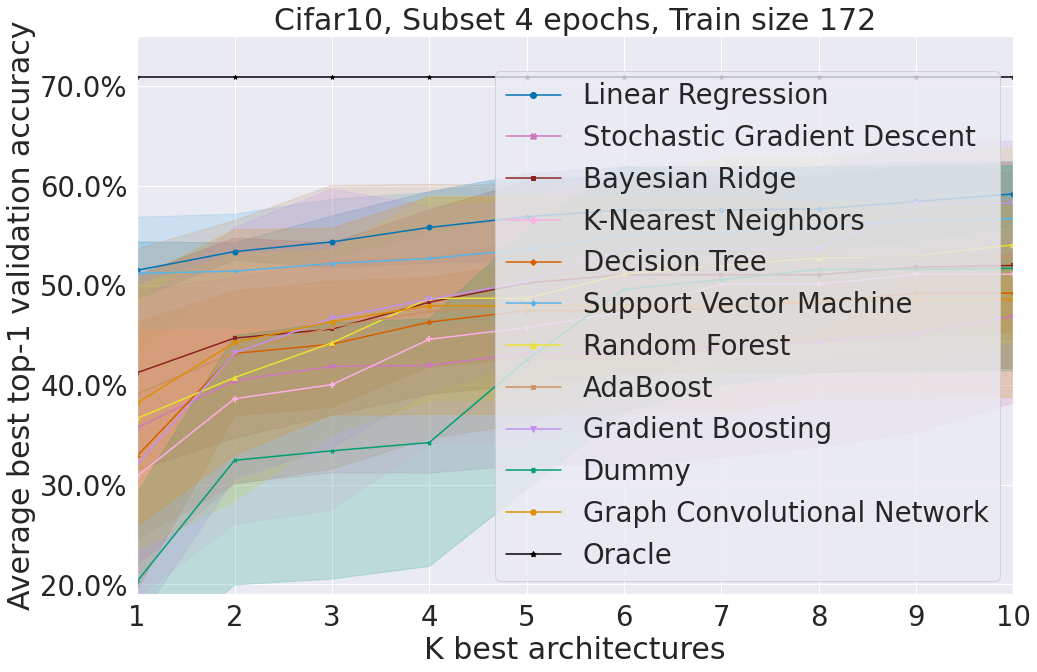

In [10]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.75])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k10_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-11-98e286c5f3f6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


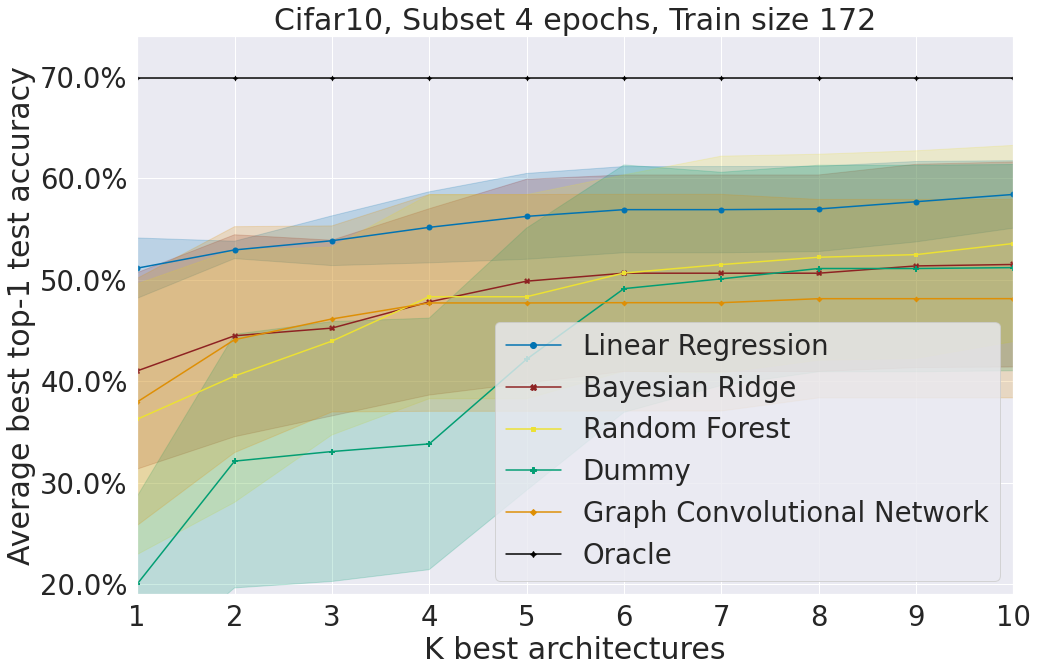

In [11]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.74])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k10_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-12-d36bcd6bac54>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


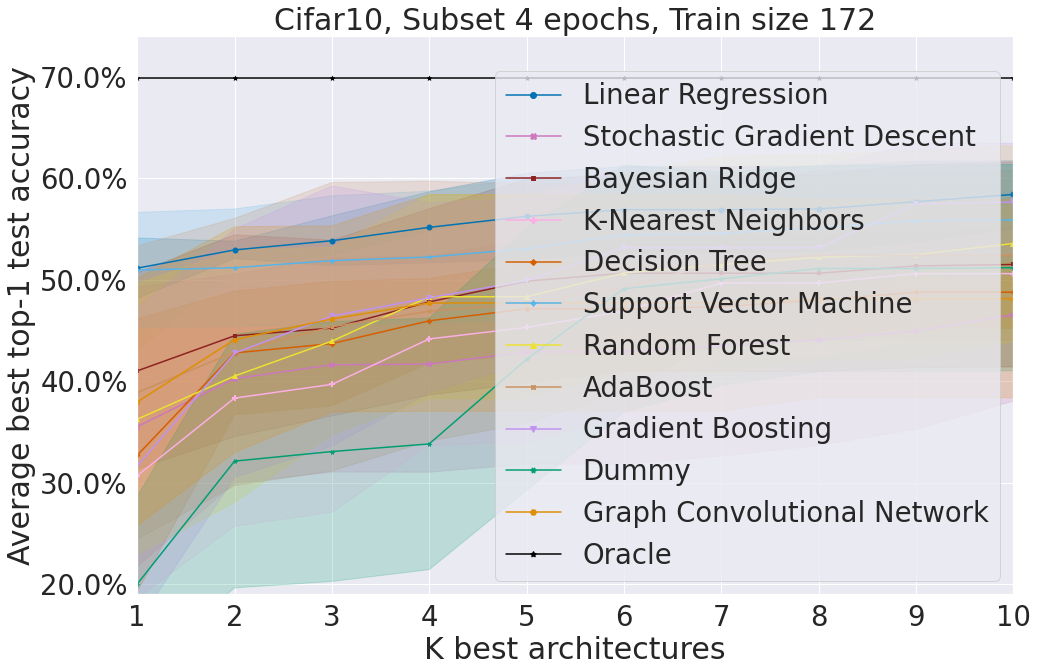

In [12]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.74])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k10_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K100)


<ipython-input-13-129d35366b4e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


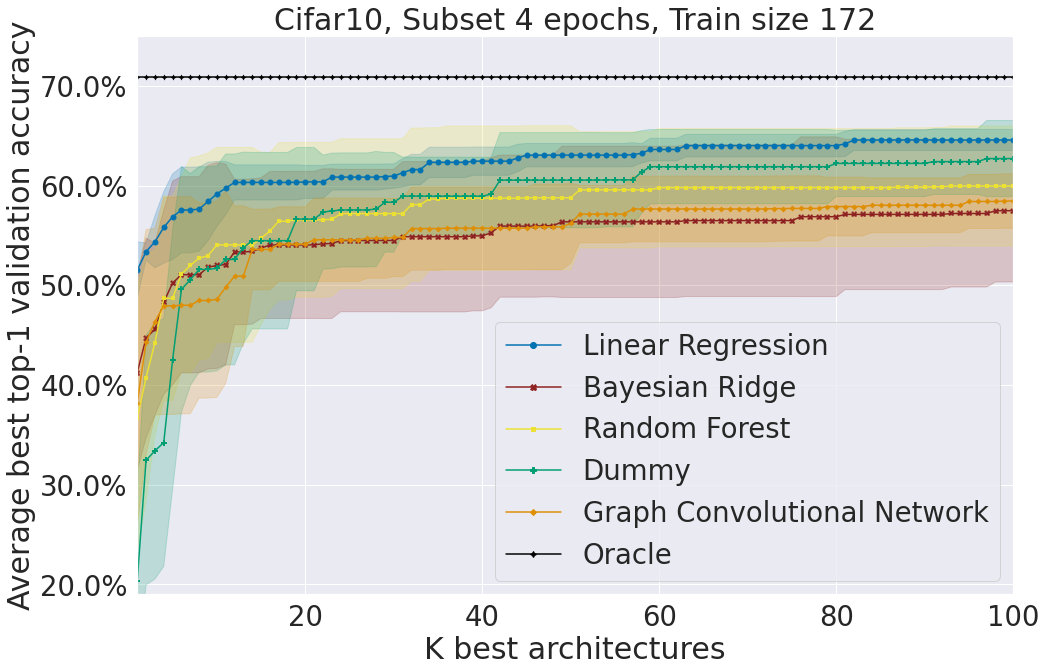

In [13]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.75])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k100_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-14-960c004099eb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


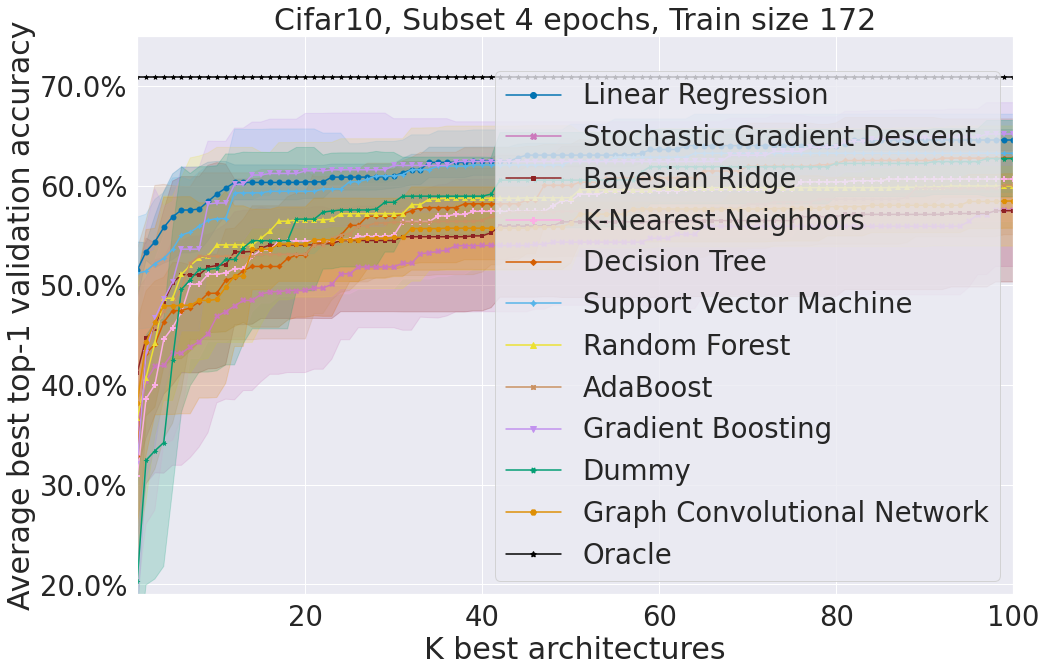

In [14]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.75])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k100_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-15-16c86a2c638d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


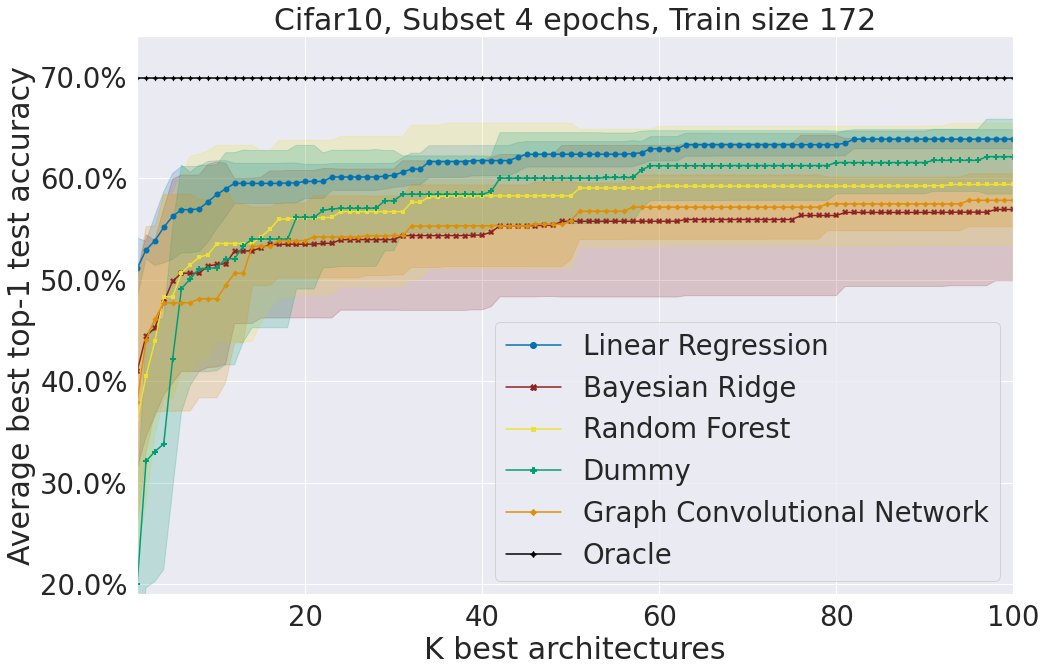

In [15]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.74])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k100_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-16-535132e5bb7d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


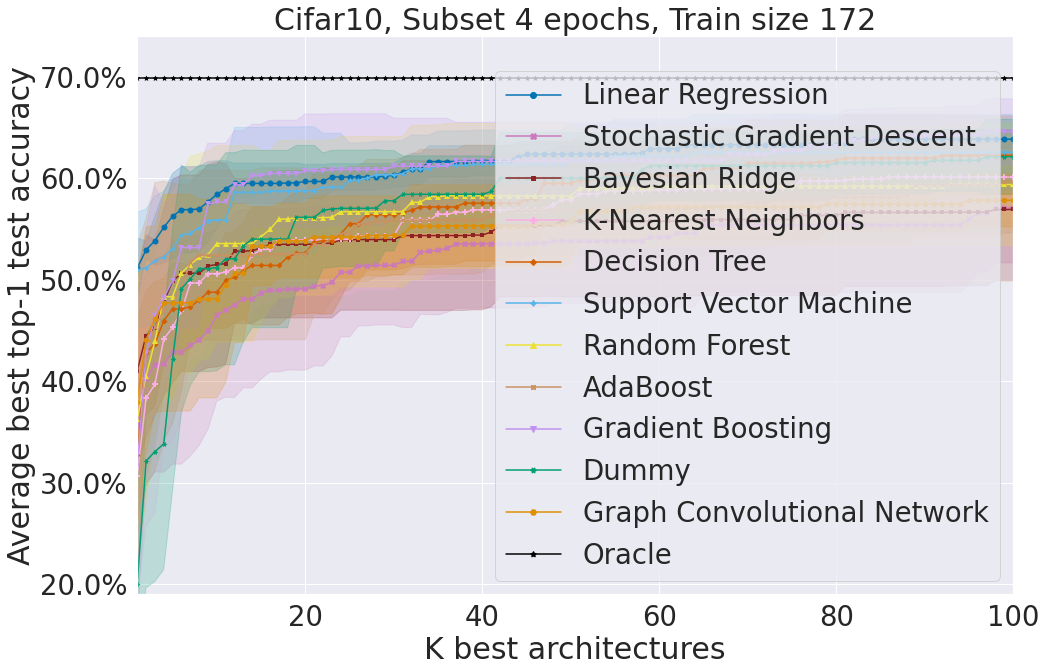

In [16]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.19, 0.74])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k100_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K1000) WITHOUT MARKERS

<ipython-input-17-dcfaa0f9f50c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


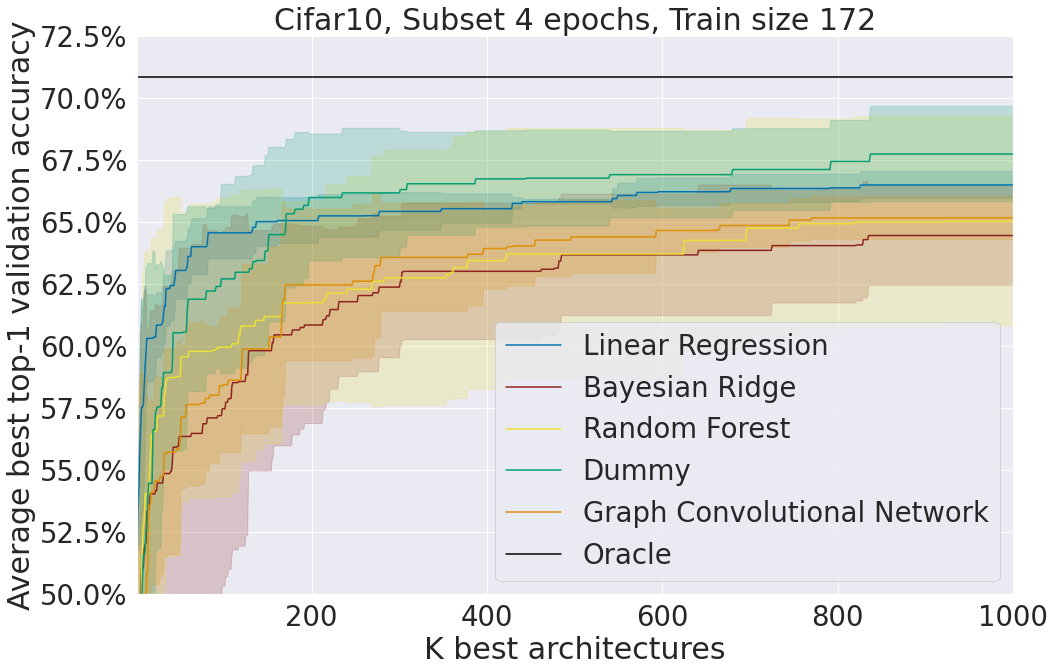

In [17]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.5, 0.725])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-18-87add11bc32e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


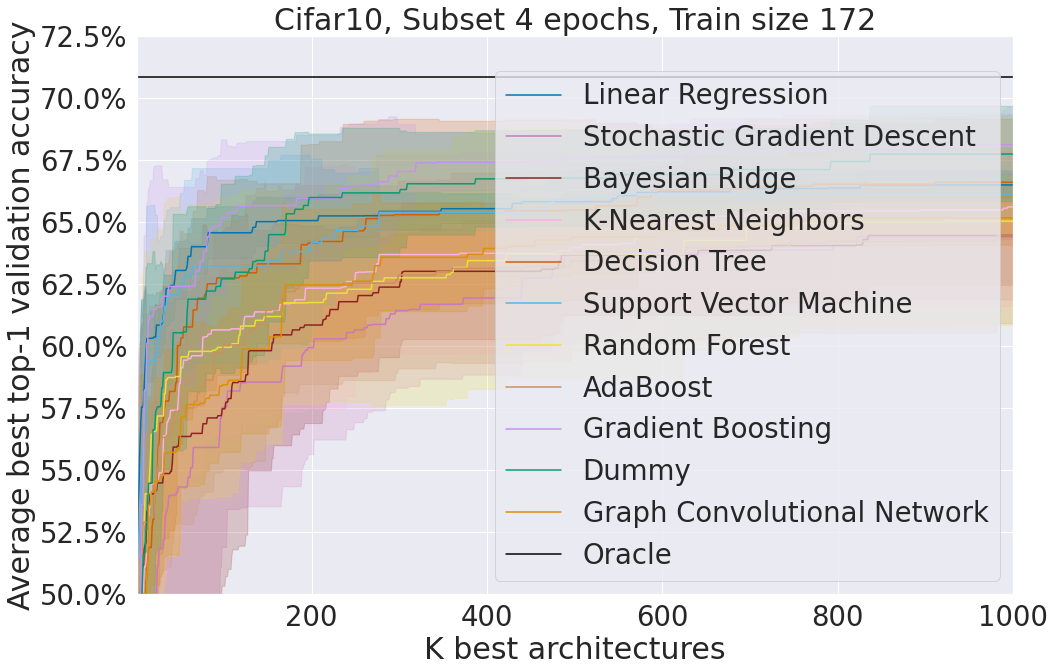

In [18]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.5, 0.725])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-19-316557a58778>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


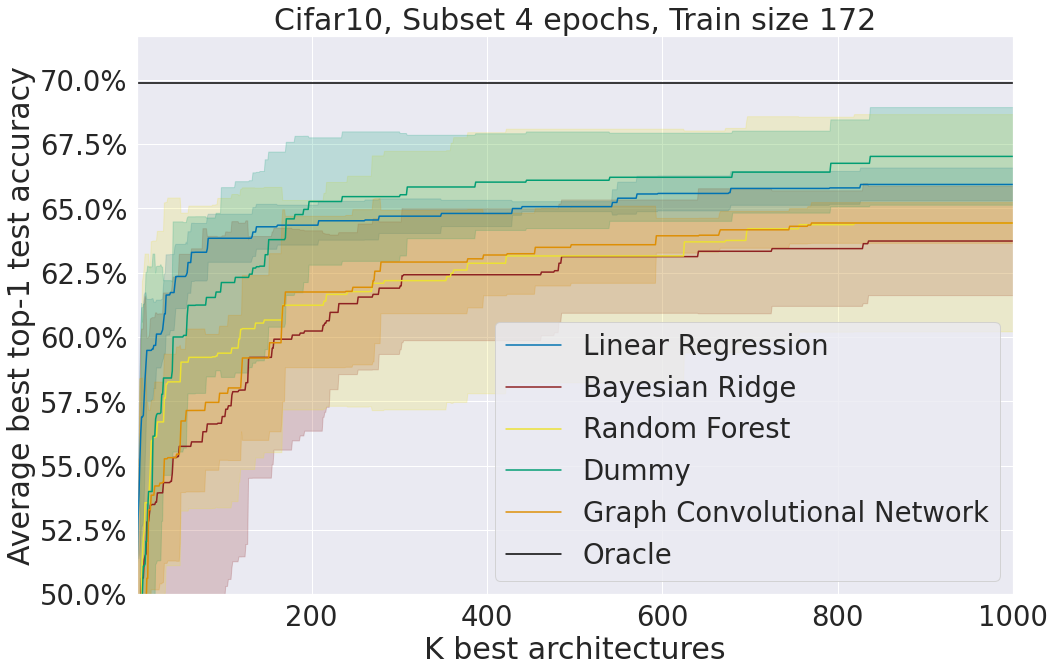

In [19]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.5, 0.717])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-20-372cee4894e1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


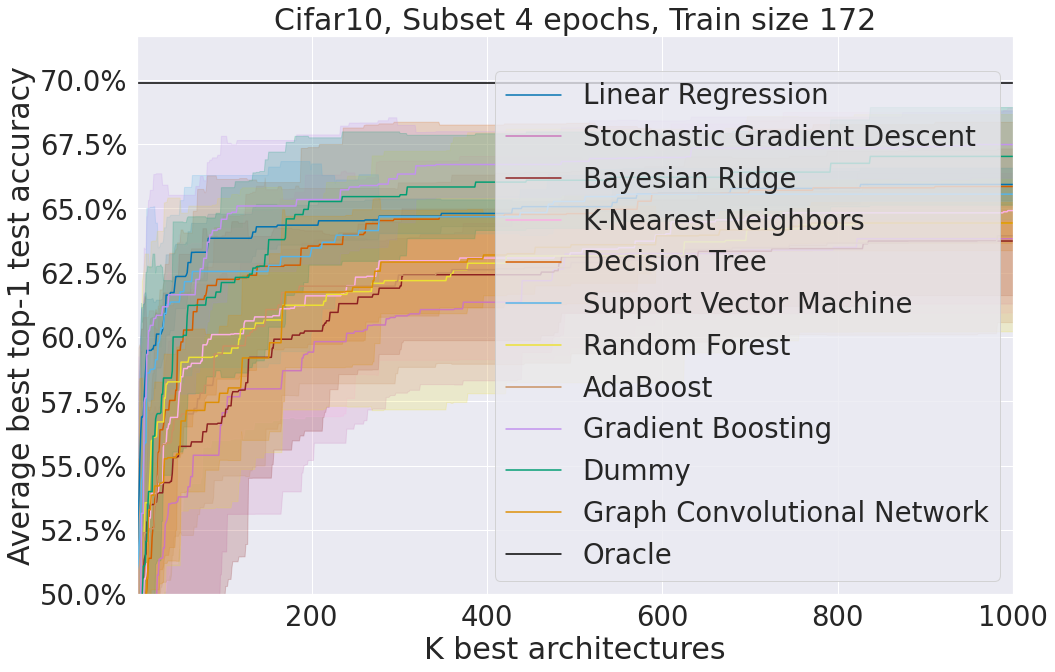

In [20]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.5, 0.717])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K1000) - Zoom In With Markers

<ipython-input-21-8f5dbbb8d4b3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


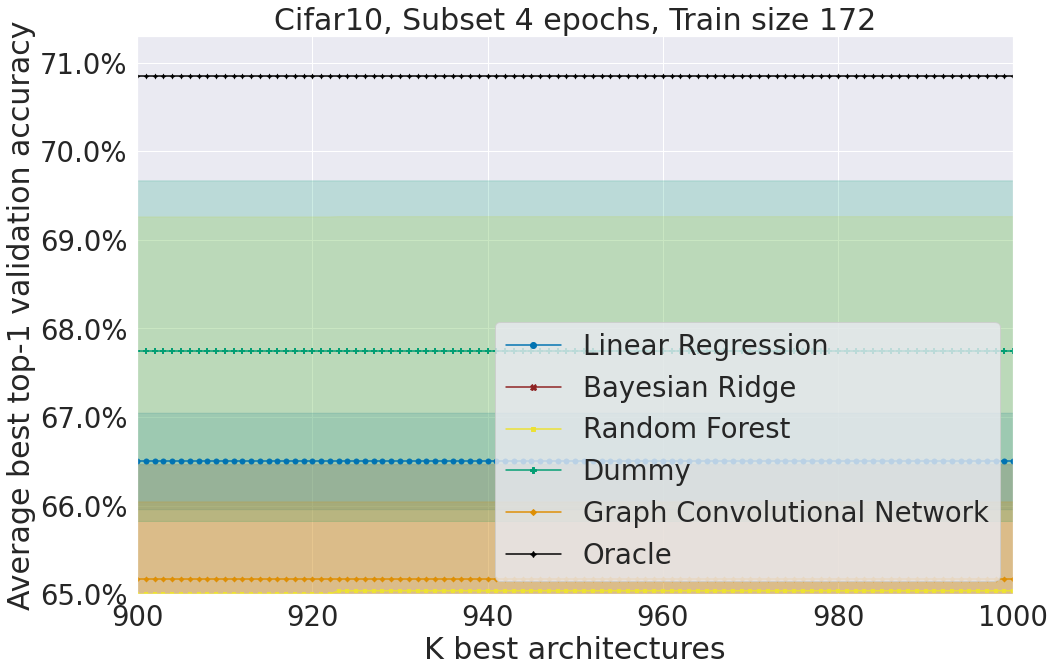

In [21]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.65, 0.713])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_val_accs_zoom.pdf'), bbox_inches='tight')

<ipython-input-22-9e2faf7c3f89>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


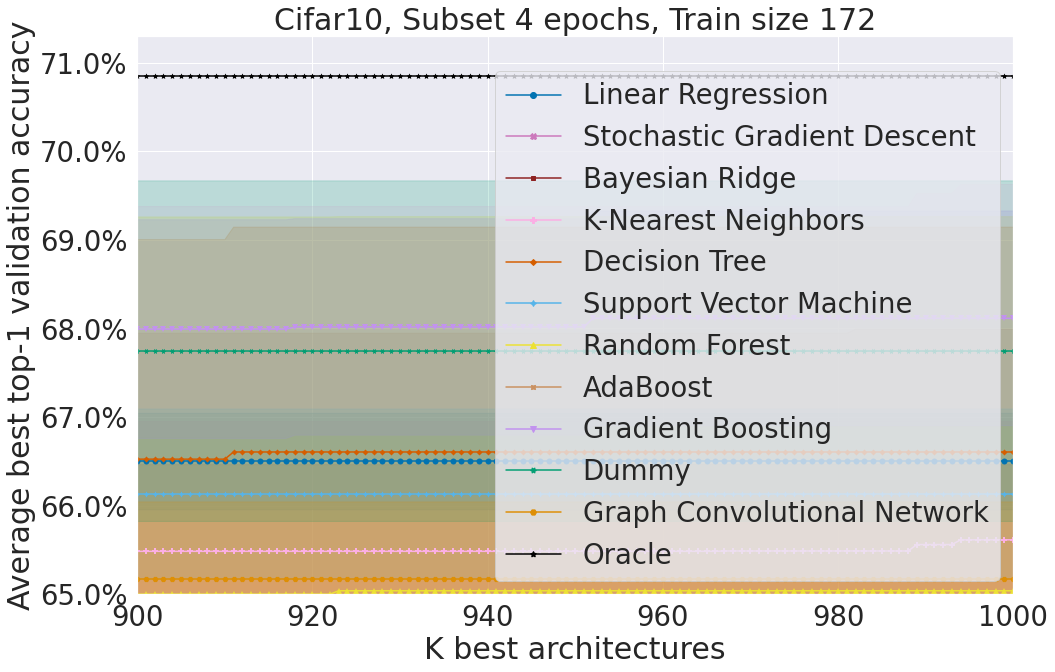

In [22]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.65, 0.713])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_val_accs_zoom_allmodels.pdf'), bbox_inches='tight')

<ipython-input-23-46cf7fdb04b8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


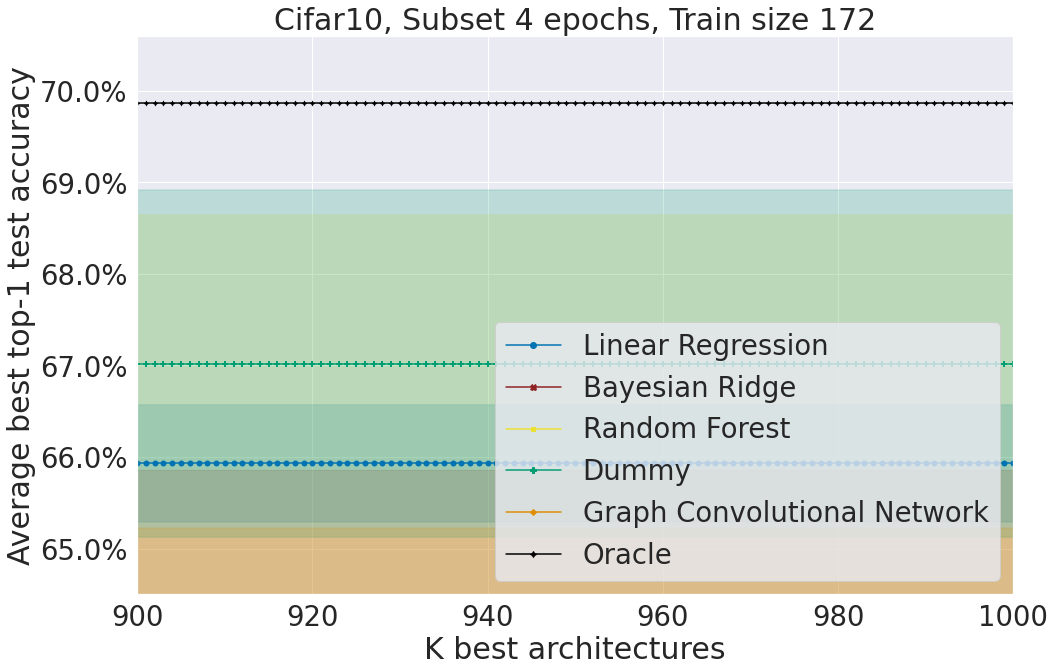

In [23]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.645, 0.706])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_test_accs_zoom.pdf'), bbox_inches='tight')

<ipython-input-24-8acc515415d8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


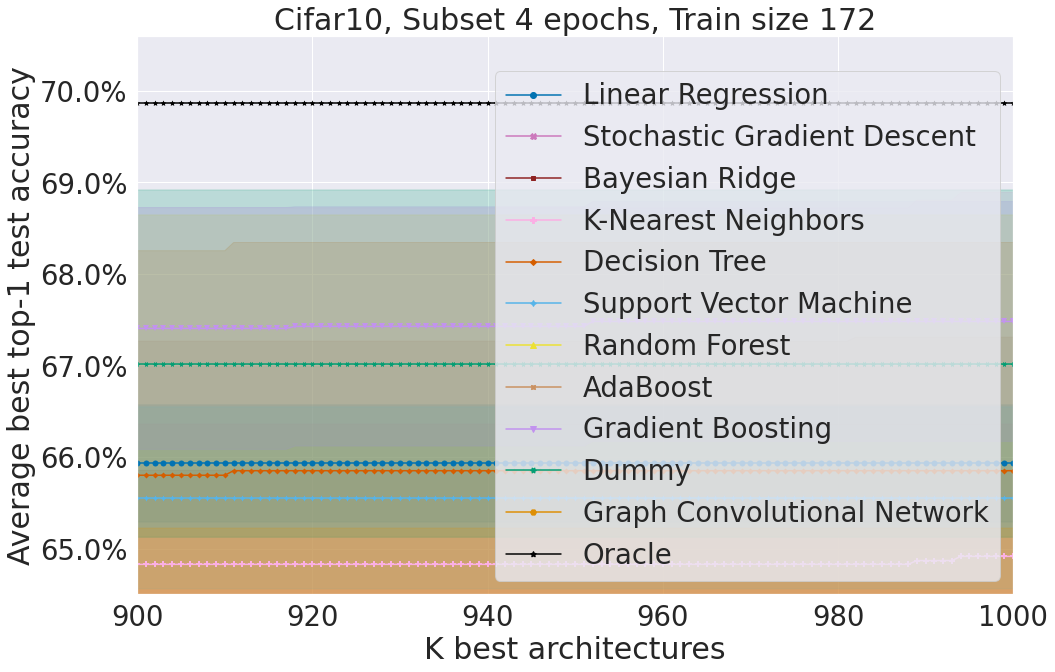

In [24]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 4 epochs, Train size 172")
ax.set_ylim([0.645, 0.706])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures") 
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_4epochs_n172_k1000_top1_test_accs_zoom_allmodels.pdf'), bbox_inches='tight')

# Subset 108

In [25]:
df_oracle = pd.read_csv("/home/gean/Code/nns_performance_prediction/results/oracle/nasbench101_108epochs_k5000_oracle.csv")
df_oracle.describe()

Epoch            K  True_Val_Acc  True_Test_Acc  Best_Test_Acc
count  5000.0  5000.000000  5.000000e+03   5.000000e+03   5.000000e+03
mean    108.0  2500.500000  9.505540e-01   9.423410e-01   9.431760e-01
std       0.0  1443.520003  1.054817e-14   3.930583e-14   6.295594e-14
min     108.0     1.000000  9.505540e-01   9.423410e-01   9.431760e-01
25%     108.0  1250.750000  9.505540e-01   9.423410e-01   9.431760e-01
50%     108.0  2500.500000  9.505540e-01   9.423410e-01   9.431760e-01
75%     108.0  3750.250000  9.505540e-01   9.423410e-01   9.431760e-01
max     108.0  5000.000000  9.505540e-01   9.423410e-01   9.431760e-01

In [26]:
df_gcn = pd.read_csv("/home/gean/Downloads/GCN_Complete_Runs/GCNComplete_Subset108_N172_K5000_nasbench_best_val_test_accs.csv")
df_gcn.describe()

K          Seed  True_Val_Acc  True_Test_Acc
count  50000.000000  50000.000000  50000.000000   50000.000000
mean    2500.500000   1552.100000      0.949766       0.941939
std     1443.390078   3623.600599      0.001930       0.001064
min        1.000000      0.000000      0.918970       0.914897
25%     1250.750000     10.000000      0.950554       0.942341
50%     2500.500000    111.500000      0.950554       0.942341
75%     3750.250000   1000.000000      0.950554       0.942341
max     5000.000000  12345.000000      0.950554       0.942341

In [27]:
df_whole = pd.read_csv("/home/gean/Code/nns_performance_prediction/results/fast/test12/Subset108_N172_K5000_nasbench_best_val_test_accs.csv")
df_whole.describe()

K           Seed  True_Test_Acc   True_Val_Acc
count  600000.000000  600000.000000  600000.000000  600000.000000
mean     2500.500000    1552.100000       0.938660       0.944792
std      1443.376847    3623.567382       0.008485       0.008997
min         1.000000       0.000000       0.782151       0.788261
25%      1250.750000      10.000000       0.938669       0.944211
50%      2500.500000     111.500000       0.940171       0.945747
75%      3750.250000    1000.000000       0.941774       0.947249
max      5000.000000   12345.000000       0.943176       0.950554

In [28]:
df_whole = df_whole.loc[(df_whole['Model'] != 'MLPRegressor') & (df_whole['Model'] != 'Lasso')]

In [29]:
df_whole = df_whole.append(df_gcn)
df_whole = df_whole.append(df_oracle)

df_whole['Model'].replace({'LinearRegression': 'Linear Regression', 
                           'DecisionTreeRegressor': 'Decision Tree', 'SGDRegressor': 'Stochastic Gradient Descent', 
                           'BayesianRidge': 'Bayesian Ridge',
                           'KNeighborsRegressor': 'K-Nearest Neighbors', 'SVR': 'Support Vector Machine',
                           'AdaBoostRegressor': 'AdaBoost', 'GradientBoostingRegressor': 'Gradient Boosting',
                           'RandomForestRegressor': 'Random Forest', 'DummyRegressor': 'Dummy',  
                           'GCN_Complete': 'Graph Convolutional Network'}, inplace=True)
df_whole

K              Model  Seed  True_Test_Acc  True_Val_Acc  Epoch  \
0        1  Linear Regression   0.0       0.931157      0.937901    NaN   
1        2  Linear Regression   0.0       0.932759      0.941339    NaN   
2        3  Linear Regression   0.0       0.932759      0.941339    NaN   
3        4  Linear Regression   0.0       0.932759      0.941339    NaN   
4        5  Linear Regression   0.0       0.932759      0.941339    NaN   
...    ...                ...   ...            ...           ...    ...   
4995  4996             Oracle   NaN       0.942341      0.950554  108.0   
4996  4997             Oracle   NaN       0.942341      0.950554  108.0   
4997  4998             Oracle   NaN       0.942341      0.950554  108.0   
4998  4999             Oracle   NaN       0.942341      0.950554  108.0   
4999  5000             Oracle   NaN       0.942341      0.950554  108.0   

      Best_Test_Acc  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
4995       0.943176  
4996       0.943176  
4997       0.943176  
4998       0.943176  
4999       0.943176  

[555000 rows x 7 columns]

<ipython-input-30-2e94accb17ef>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


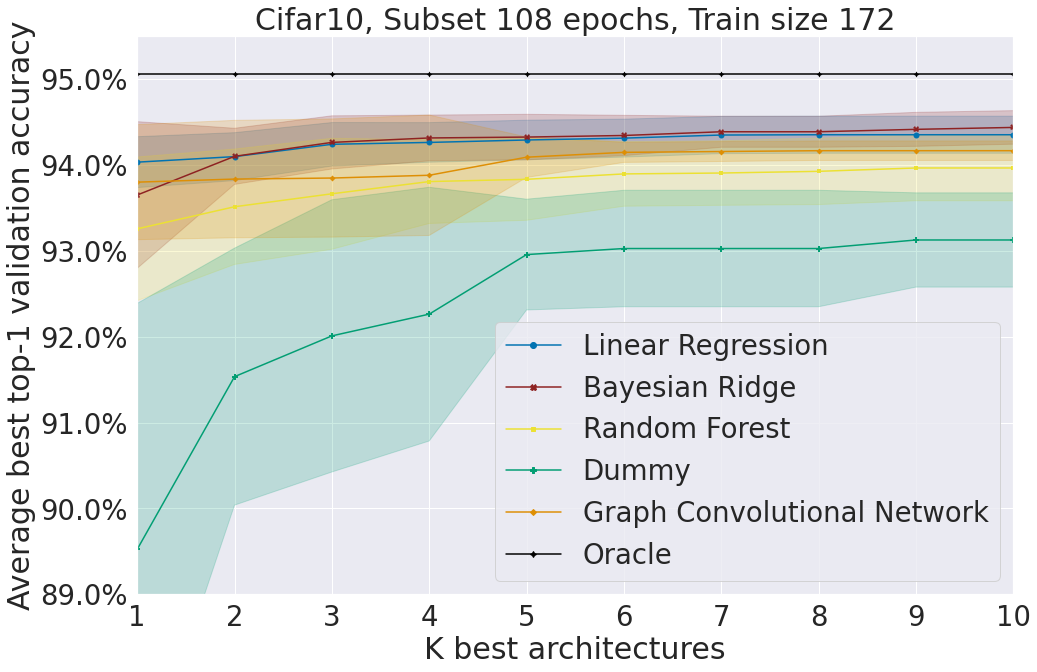

In [30]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.89, 0.955])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k10_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-31-a4548fa8df55>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


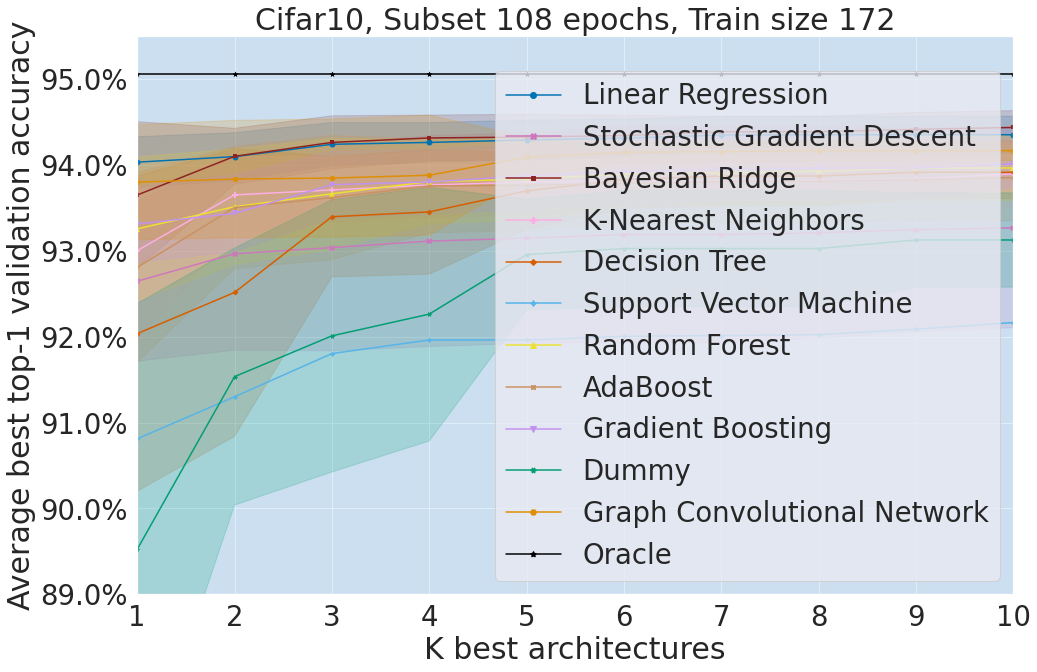

In [31]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.89, 0.955])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k10_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-32-7e7b93860980>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


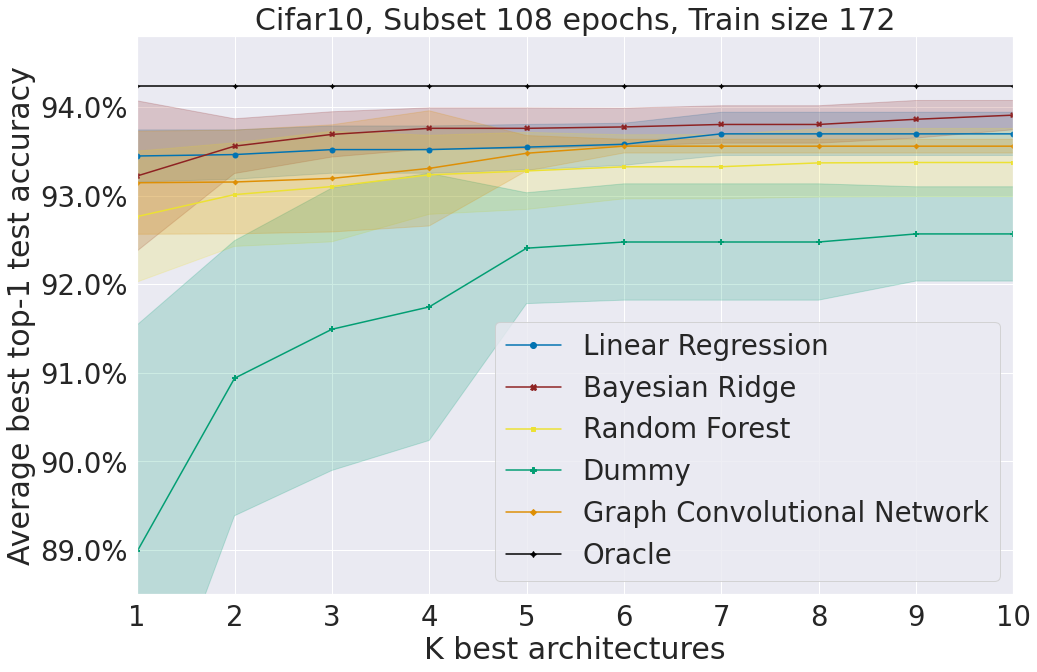

In [32]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.885, 0.948])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k10_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-33-b2eee01f16cc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


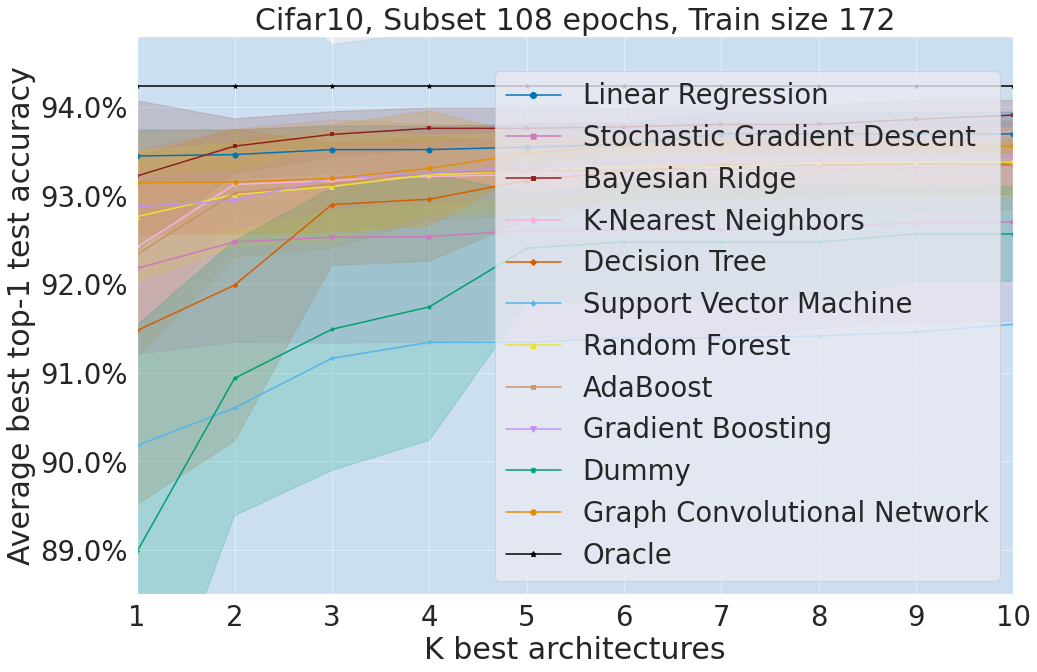

In [33]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.885, 0.948])
ax.set_xlim([1, 10])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k10_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K100)


<ipython-input-34-742a79885fa6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


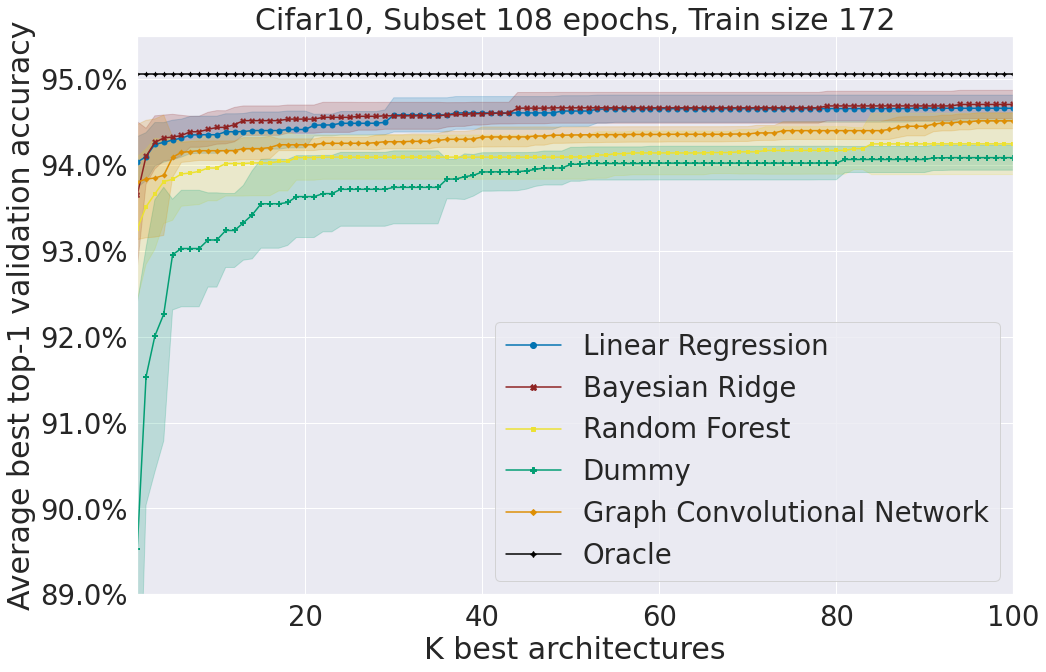

In [34]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.89, 0.955])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k100_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-35-20e787a0bf9e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


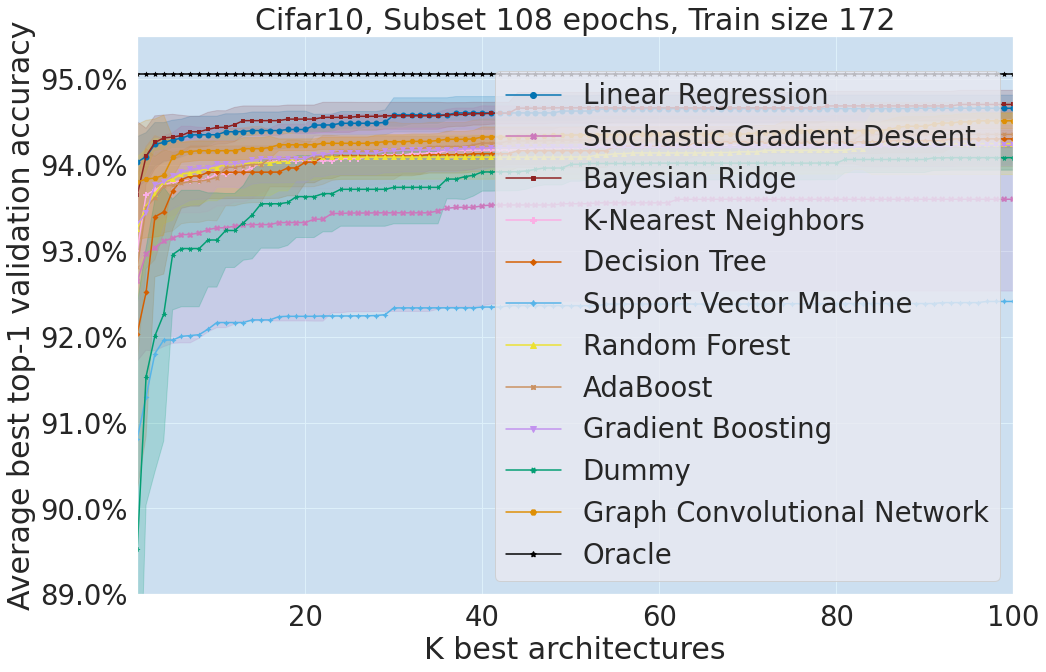

In [35]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.89, 0.955])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k100_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-36-de10499d448b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


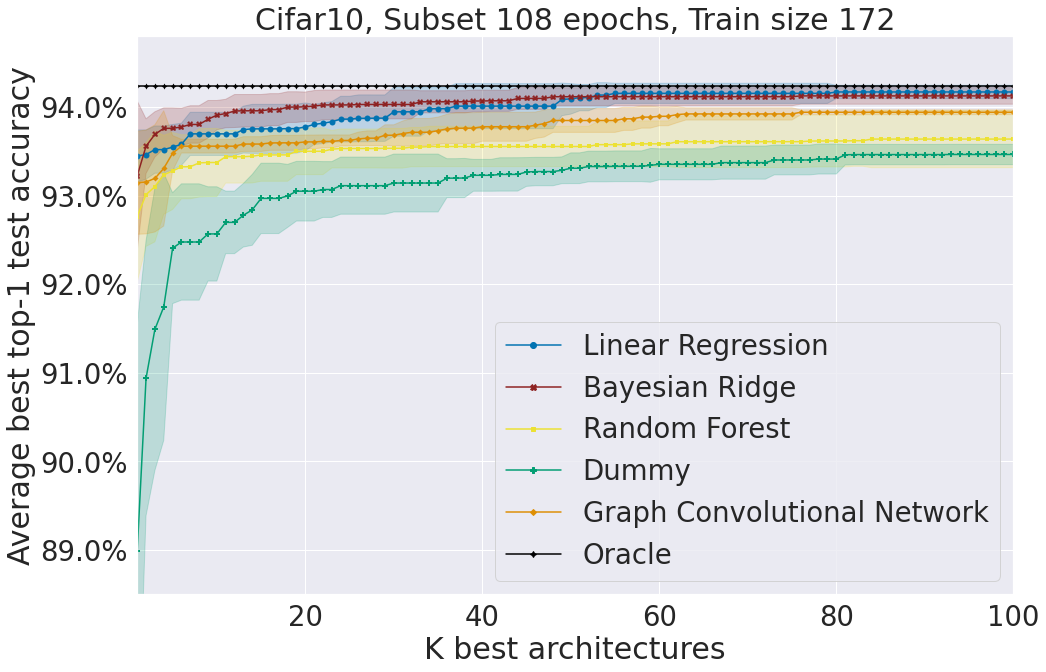

In [36]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.885, 0.948])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k100_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-37-4976d22b4ee7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


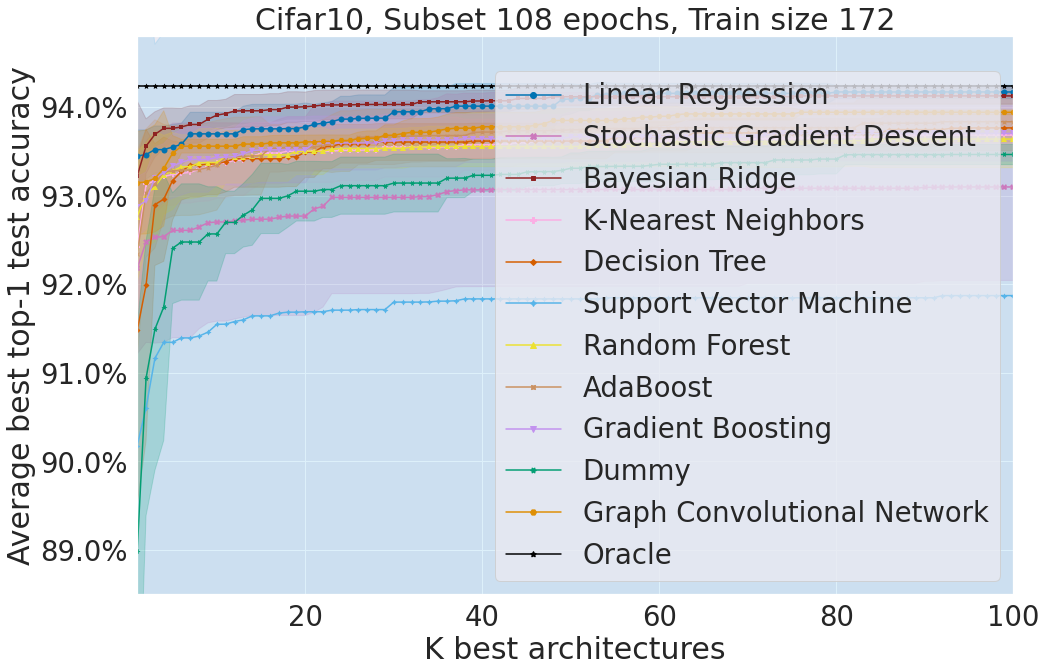

In [37]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.885, 0.948])
ax.set_xlim([1, 100])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k100_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K1000) WITHOUT MARKERS

<ipython-input-38-cc8cc1af39fb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


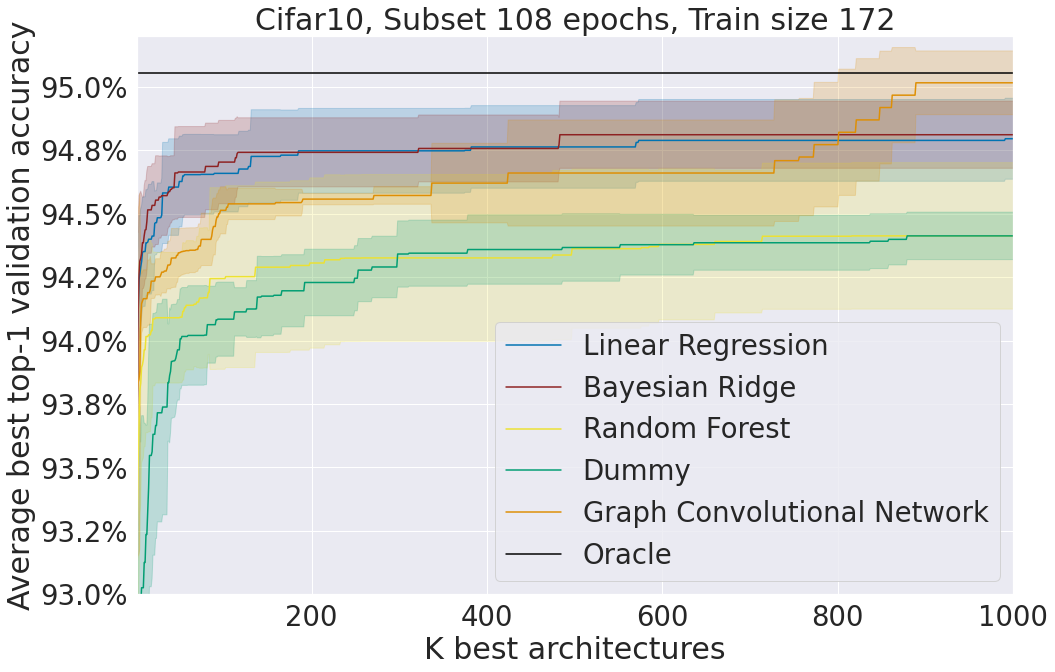

In [38]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.93, 0.952])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_val_accs.pdf'), bbox_inches='tight')

<ipython-input-39-3b84020c8e58>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


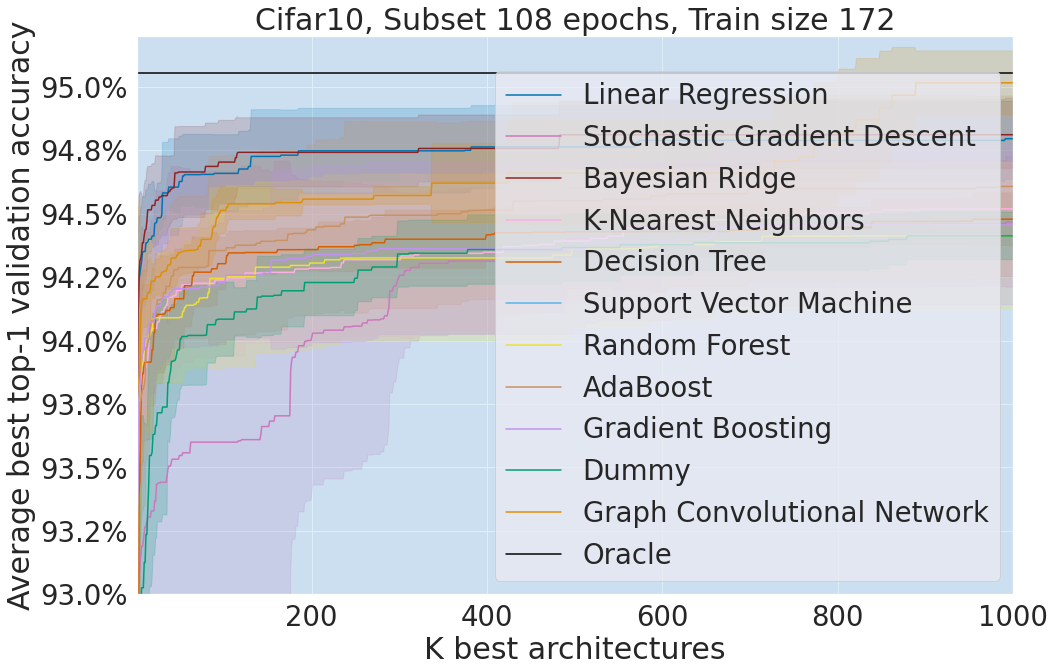

In [39]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.93, 0.952])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_val_accs_allmodels.pdf'), bbox_inches='tight')

<ipython-input-40-b58d77a7ed4f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


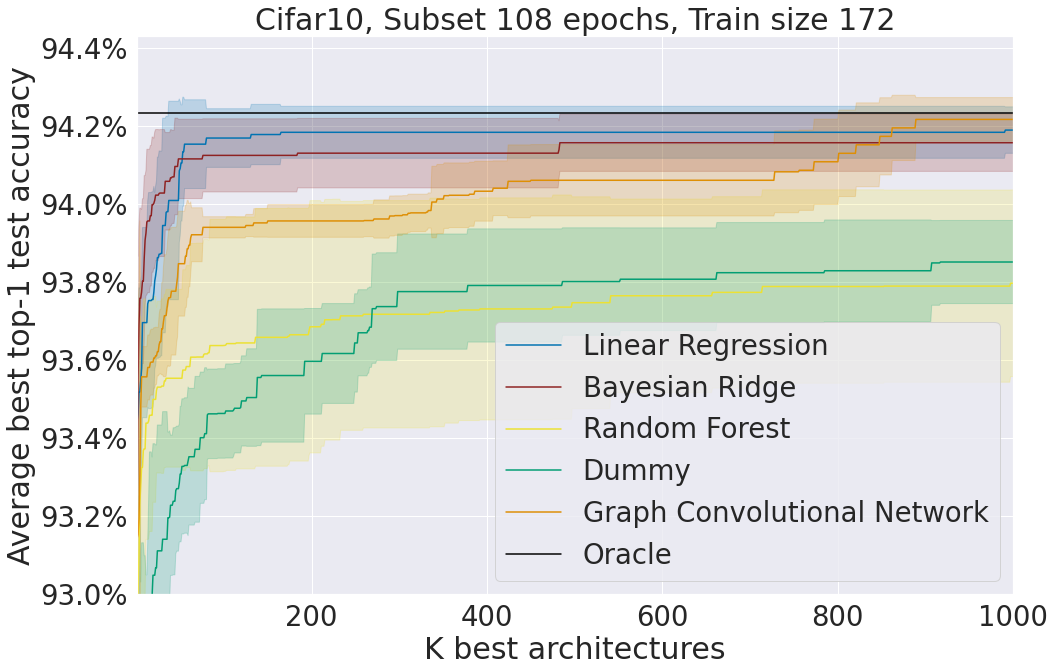

In [40]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.93, 0.9443])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_test_accs.pdf'), bbox_inches='tight')

<ipython-input-41-43c5981c2b25>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


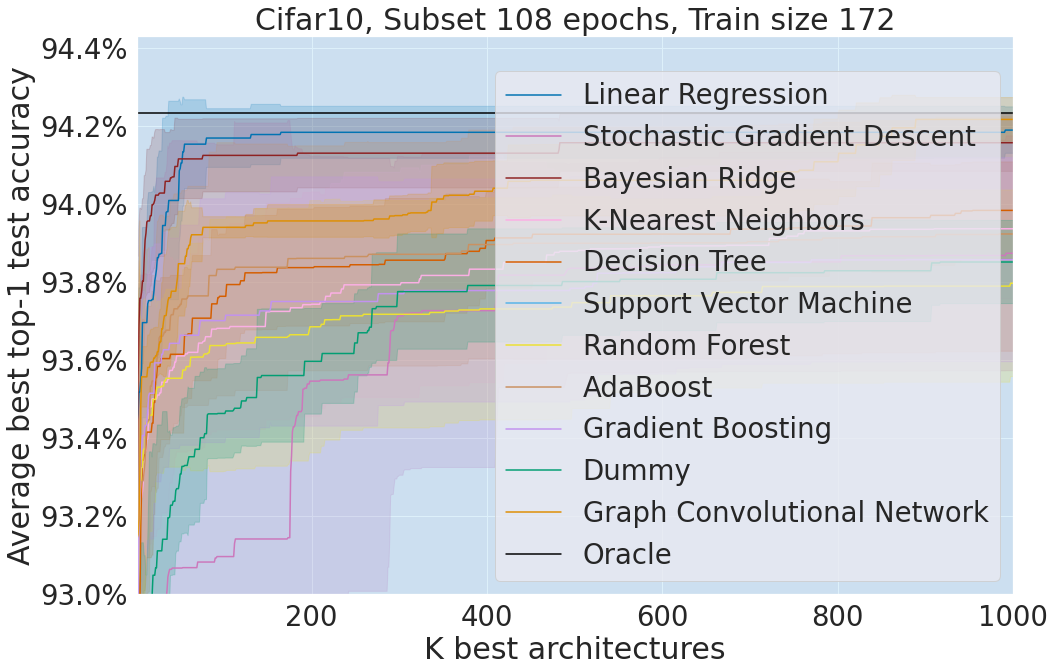

In [41]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=False, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.93, 0.9443])
ax.set_xlim([1, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k5000_top1_test_accs_allmodels.pdf'), bbox_inches='tight')

## Selected Models (K1000) - Zoom In

<ipython-input-42-3a14b9dea1eb>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


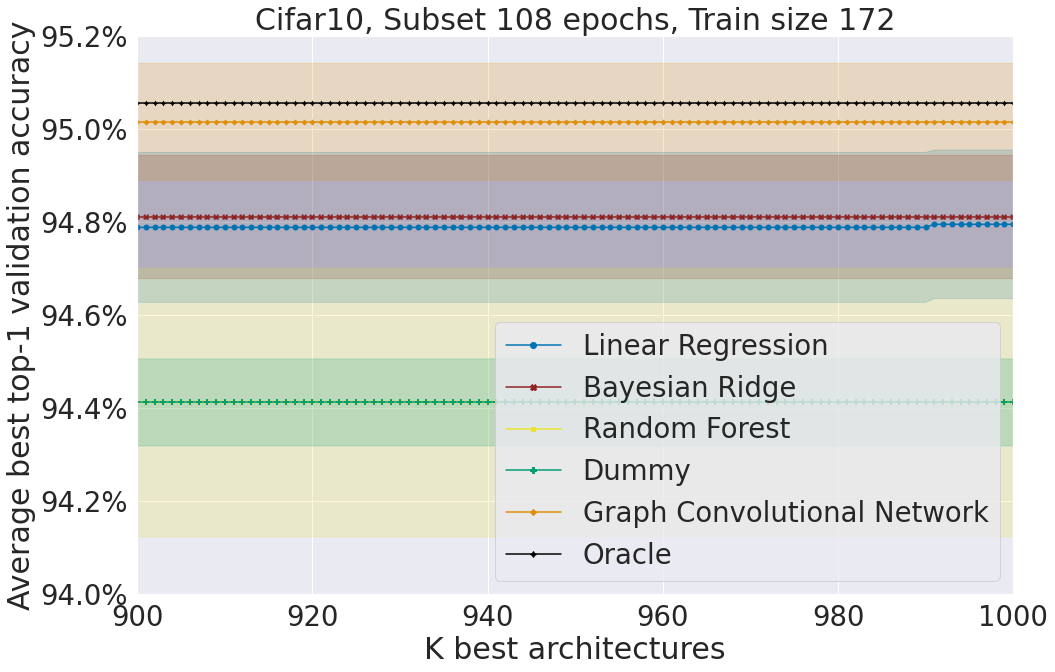

In [42]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.94, 0.952])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')


ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_val_accs_zoom.pdf'), bbox_inches='tight')

<ipython-input-43-edfa1d86cdc5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


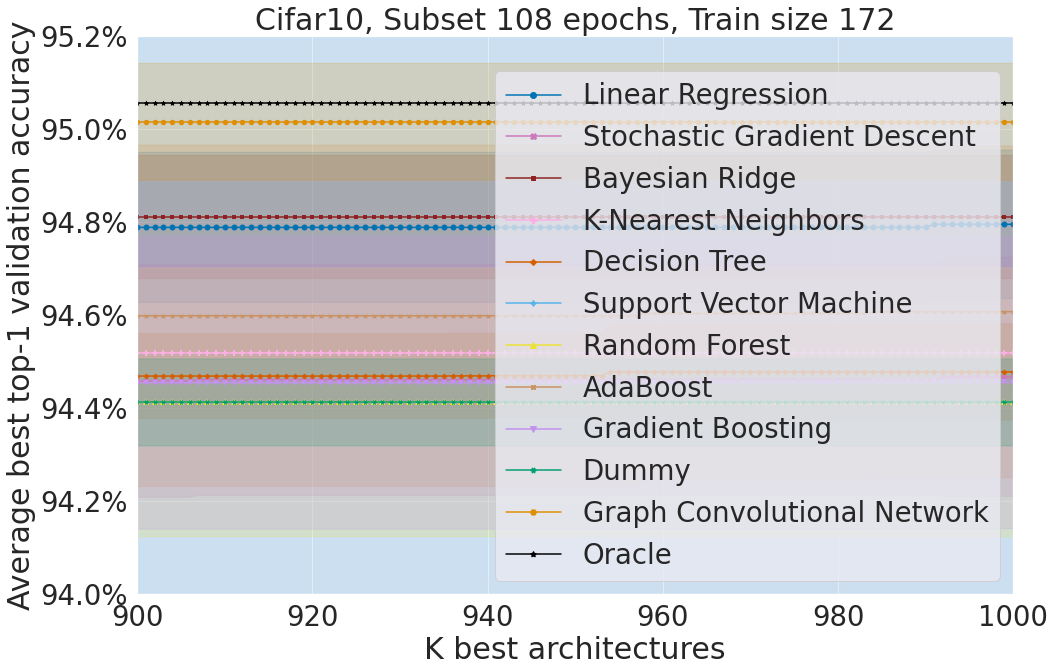

In [43]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Val_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.94, 0.952])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 validation accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')


ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_val_accs_zoom_allmodels.pdf'), bbox_inches='tight')

<ipython-input-44-9a1c3f1b178c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


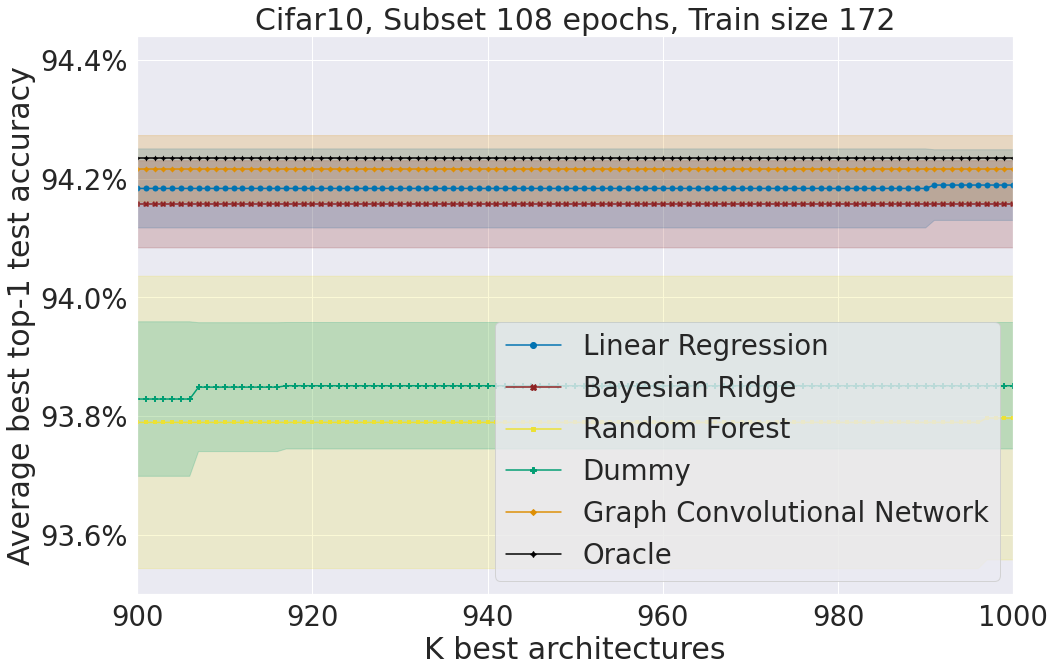

In [44]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole.loc[df_whole['Model'].isin(selected_models)], x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.935, 0.9444])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)


plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_test_accs_zoom.pdf'), bbox_inches='tight')

<ipython-input-45-81077ed19aa4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


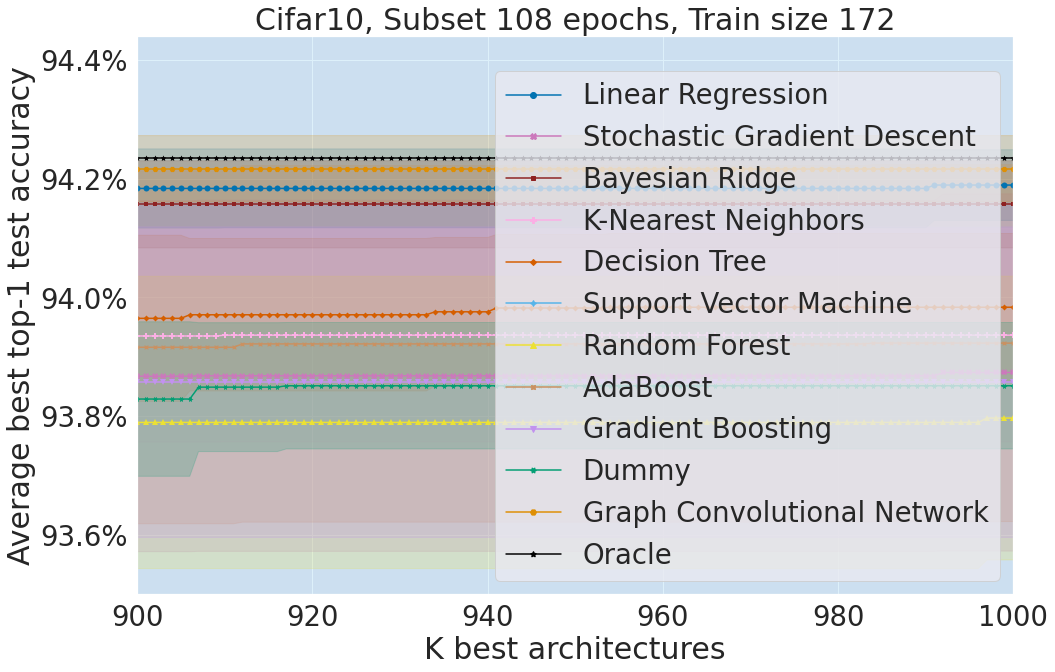

In [45]:
fig, ax = plt.subplots()
sns.lineplot(data=df_whole, x="K", y="True_Test_Acc", hue="Model", 
             style="Model", markers=True, palette=palette, markeredgewidth=0, dashes=False, ci="sd", ax=ax)

ax.set_title("Cifar10, Subset 108 epochs, Train size 172")
ax.set_ylim([0.935, 0.9444])
ax.set_xlim([900, 1000])
ax.set_ylabel("Average best top-1 test accuracy")
ax.set_xlabel("K best architectures")
ax.legend(loc='lower right')

ylabels = ["{:.1%}".format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)


plt.savefig(str('/home/gean/Code/nns_performance_prediction/results/fast/test12/' + 
                'nasbench101_108epochs_n172_k1000_top1_test_accs_zoom_allmodels.pdf'), bbox_inches='tight')